# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
from numpy import recfromcsv
class_data = recfromcsv('signnames.csv', delimiter=',')

n_classes = len(class_data)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from pprint import pprint
import matplotlib.gridspec as gridspec
from collections import defaultdict
from random import randint
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:

#This transform_image code is courtesy of udacity member vivek
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img   

def fillTrainingSet(index,number,listTrainingIndexes):
    x = []
    y = []
    
    randomIndex = listTrainingIndexes[randint(0,len(listTrainingIndexes))]
    #get a random sample sign image of this index
    image = X_train[randomIndex]
    
    for i in range(0,number):
        #transform image
        img = transform_image(image,20,10,5)
        #add to X_train and y_train
        x.append(img)
        y.append(index)
    return x,y
        
def plotImageByIndex(index):
    plt.suptitle(class_data[y_train[index]])
    plt.imshow(X_train[index])
    
def showImageGrid(images,x,y,labels = []):
    gs1 = gridspec.GridSpec(x, y)
    #gs1.update(wspace=0.00, hspace=0.00) # set the spacing between axes. 
    plt.figure(figsize=(8,8))
    for i in range(len(images)):
        ax1 = plt.subplot(gs1[i])
        if len(labels) == len(images):
            print(labels[i])
            ax1.set_title(labels[i])
        plt.subplot(x,y,i+1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

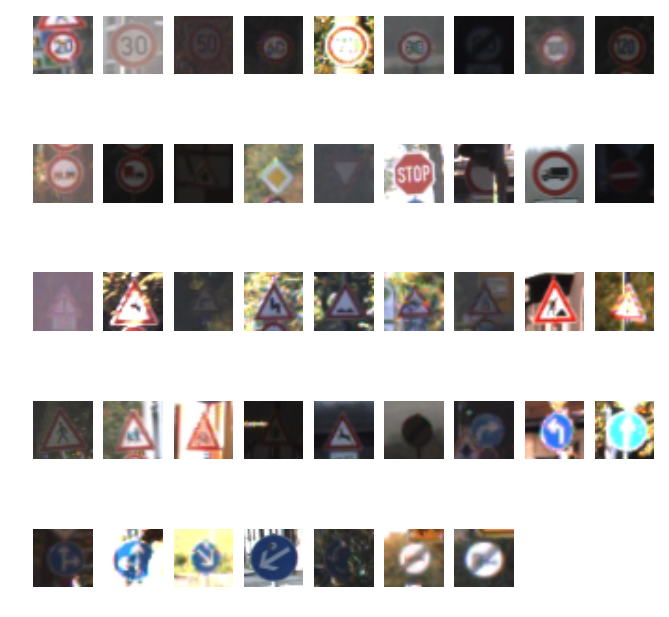

Distribution of classes:
{0: 210, 1: 2220, 2: 2250, 3: 1410, 4: 1980, 5: 1860, 6: 420, 7: 1440, 8: 1410, 9: 1470, 10: 2010, 11: 1320, 12: 2100, 13: 2160, 14: 780, 15: 630, 16: 420, 17: 1110, 18: 1200, 19: 210, 20: 360, 21: 330, 22: 390, 23: 510, 24: 270, 25: 1500, 26: 600, 27: 240, 28: 540, 29: 270, 30: 450, 31: 780, 32: 240, 33: 689, 34: 420, 35: 1200, 36: 390, 37: 210, 38: 2070, 39: 300, 40: 360, 41: 240, 42: 240}
Maximum number of values on a class:  2250


In [5]:
def generateCountMap():
    countMap = defaultdict(list)
    for i in range(len(X_train)):
        index = y_train[i] 
        countMap[index].append(i)
    return countMap

def generateValueCountMap(countMap):
    valueCountMap = dict.fromkeys(list(range(n_classes)),list())
    for i in range(n_classes):
        valueCountMap[i] = len(countMap[i])
    return valueCountMap

def printClassSamples():
    #print all classes once
    each_class_sample = [item[0] for item in countMap.values()]
    sample_images = []
    sample_labels = []
    count = 0
    for sample in each_class_sample:
        sample_images.append(X_train[sample])
        #sample_labels.append(class_data[count])
        count += 1
    showImageGrid(sample_images,5,9, sample_labels)

countMap = generateCountMap()
valueCountMap = generateValueCountMap(countMap)

printClassSamples()

print('Distribution of classes:')
print(valueCountMap)
#distribution shows inbalanced data, so generate equal data for all signs
maxValue = max(valueCountMap.values())
print('Maximum number of values on a class: ', maxValue)
#So maxValue will be the total number of labeled data generated for all others which have less

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

# Preprocess Data

In [6]:
def batch_norm(x, ptrain, scope=None):
    with tf.variable_scope('bn'):
        batch_norm = tf.cond(ptrain, 
        lambda: tf.contrib.layers.batch_norm(x, activation_fn=tf.nn.relu, updates_collections=None, is_training=True, reuse=None, scope=scope),
        lambda: tf.contrib.layers.batch_norm(x, activation_fn =tf.nn.relu, updates_collections=None, is_training=False, reuse=True, scope=scope))
        return batch_norm

### Generate data additional data (OPTIONAL!)
#for each class add the number of missing labeled data up to maxValue by generating new transformed images 
#of existing labeled data, so that from each class exists the same number of samples
addJitterData = False

#Fill up missing values
if addJitterData:
    for i in range(0,n_classes):
        missing = np.absolute(valueCountMap[i] - maxValue)
        #print('Generating missing values for sign index ', i, ' = ', missing)
        x,y = fillTrainingSet(i,missing,countMap[i])
        if len(x) == 0:
            continue
        X_train = np.concatenate((X_train,x))
        y_train = np.concatenate((y_train,y))
            
    #Also generate from each class type another 2 jitterimages
    '''countMap = generateCountMap()
    valueCountMap = generateValueCountMap(countMap)

    for i in range(0,n_classes):
        x,y = fillTrainingSet(i,2,countMap[i])
        X_train = np.concatenate((X_train,x))
        y_train = np.concatenate((y_train,y))'''
        
#Do normalization 0-1
X_train = X_train / 255.0

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [7]:
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    print_activations(x)
    x = tf.nn.bias_add(x, b)
    print_activations(x)
    return x

def activate(x, atype = 'relu', scope=None):
    temp = x
    if atype == 'relu':
        temp = tf.nn.relu(x, name=scope.name)
    elif atype == 'tanh':
        temp = tf.nn.tanh(x, name=scope.name)
        
    print_activations(temp)
    return temp

def maxpool2d(x, k=2):
    temp = tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')
    print_activations(temp)
    return temp

def dropout(hidden_layer, keep_prob = 0.5):
    temp = tf.nn.dropout(hidden_layer, keep_prob)
    print_activations(hidden_layer)
    return temp

def print_activations(temp, do=False):
    if do:
        print(temp.op.name, ' ', temp.get_shape().as_list())
    

def training(loss, learning_rate, global_step):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss, global_step=global_step)
    return training_operation

def evaluation(y_pred, one_hot_y):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(one_hot_y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

def LeNet(x,ptrain, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    n_classes = 43
    
    layer_depth = {
        'layer_1': 8,
        'layer_2': 16,
        'fully_connected_1': 120,
        'fully_connected_2': 84,
        'fully_connected_3': 43
    }
    
    weights = {
        'layer_1': tf.Variable(tf.truncated_normal(
            [3, 3, 3, layer_depth['layer_1']], mean = mu, stddev = sigma)),
        'layer_2': tf.Variable(tf.truncated_normal(
            [5, 5, layer_depth['layer_1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
        'fully_connected_1': tf.Variable(tf.truncated_normal(
            [400, layer_depth['fully_connected_1']], mean = mu, stddev = sigma)),
        'fully_connected_2': tf.Variable(tf.truncated_normal(
            [120, layer_depth['fully_connected_2']], mean = mu, stddev = sigma)),
        'fully_connected_3': tf.Variable(tf.truncated_normal(
            [84, layer_depth['fully_connected_3']], mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal(
            [layer_depth['fully_connected_3'], n_classes], mean = mu, stddev = sigma))
    }
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
        'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
        'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
        'fully_connected_3': tf.Variable(tf.zeros(layer_depth['fully_connected_3'])),
        'out': tf.Variable(tf.zeros(n_classes))
    }
    with tf.variable_scope('conv_1') as scope:
        # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x8.
        conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])

        #Batch norm
        #conv1 = batch_norm(conv1, ptrain, scope)

        # Activation.
        conv1 = activate(conv1, 'relu', scope)

        # Pooling. Input = 30x30x8. Output = 15x15x8.
        conv1 = maxpool2d(conv1)

        conv1 = dropout(conv1, keep_prob)

    with tf.variable_scope('conv_2') as scope:
        # Layer 2: Convolutional. Input = 15x15x8 Output = 11x11x16.
        conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])

        #Batch norm
        #conv2 = batch_norm(conv2, ptrain, scope)

        # Activation.
        conv2 = activate(conv2, 'relu', scope)

        # Pooling. Input = 11x11x16. Output = 5x5x16.
        conv2 = maxpool2d(conv2)

        conv2 = dropout(conv2, keep_prob)
    
        # Flatten. Input = 5x5x16. Output = 400.
        flatten_1 = flatten(conv2)
    
    with tf.variable_scope('fc_1') as scope:
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1 = tf.reshape(flatten_1,[-1, weights['fully_connected_1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['fully_connected_1']),biases['fully_connected_1'])
        fc1 = activate(fc1, 'tanh', scope)

        # Activation.
        fc1 = activate(fc1, 'relu', scope)

        fc1 = dropout(fc1, keep_prob)
    
    with tf.variable_scope('fc_2') as scope:
        # Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2 = tf.reshape(fc1,[-1, weights['fully_connected_2'].get_shape().as_list()[0]])
        fc2 = tf.add(tf.matmul(fc2, weights['fully_connected_2']),biases['fully_connected_2'])
        fc2 = activate(fc2, 'tanh', scope)

        # Activation.
        fc2 = activate(fc2, 'relu', scope)

        fc2 = dropout(fc2, keep_prob)

    with tf.variable_scope('fc_3') as scope:
        # Layer 5: Fully Connected. Input = 84. Output = 43.
        fc3 = tf.reshape(fc2,[-1, weights['fully_connected_3'].get_shape().as_list()[0]])
        fc3 = tf.add(tf.matmul(fc3, weights['fully_connected_3']),biases['fully_connected_3'])

        # Read out
        y_pred = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
   
    print_activations(y_pred)
    
    return y_pred

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

## Using modified LeNet-5
[LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.

### Architecture
**Layer 1: Convolutional.**

**Batch normalization.** 

**Activation.** 

**Pooling.** 

**Layer 2: Convolutional.** 

**Batch normalization.** 

**Activation.** 

**Pooling.** 

**Flatten.** 

**Layer 3: Fully Connected.** 

**Activation.** 

**Layer 4: Fully Connected.** 

**Activation.** 

**Layer 5: Fully Connected (Logits).** 

In [11]:
import os
### Train your model here.
TASK = 'train' # 'train' or 'test'
chkpt_file = '../my_cnn.ckpt'

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
ptrain = tf.placeholder(tf.bool, name='train')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

EPOCHS = 10
BATCH_SIZE = 128

epoch_size = 100000
global_step = tf.Variable(0, name='global_step', trainable=False)
learning_rate = tf.train.exponential_decay(
  0.001,                # Base learning rate.
  global_step * BATCH_SIZE,  # Current index into the dataset.
  epoch_size,          # Decay step.
  0.9,                # Decay rate.
  staircase=True)

y_pred = LeNet(x,ptrain,keep_prob)

 # Get Loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(y_pred, one_hot_y)
loss = tf.reduce_mean(cross_entropy)

# Update
train_step = training(loss, learning_rate, global_step)

# Eval
accuracy = evaluation(y_pred, one_hot_y)

vars_to_train = tf.trainable_variables()
vars_for_bn1 = tf.get_collection(tf.GraphKeys.VARIABLES, scope='conv_1/bn')
vars_for_bn2 = tf.get_collection(tf.GraphKeys.VARIABLES, scope='conv_2/bn')
vars_to_train = list(set(vars_to_train).union(set(vars_for_bn1)))
vars_to_train = list(set(vars_to_train).union(set(vars_for_bn2)))

if TASK == 'test' or os.path.exists(chkpt_file):
    restore_call = True
    vars_all = tf.all_variables()
    vars_to_init = list(set(vars_all) - set(vars_to_train))
    init = tf.initialize_variables(vars_to_init)
elif TASK == 'train':
    restore_call = False
    init = tf.initialize_all_variables()
else:
    print('please set TASK to either train or test')

saver = tf.train.Saver(vars_to_train)

In [12]:
with tf.Session() as sess:
    sess.run(init)
    
    if restore_call:
        # Restore variables from disk.
        saver.restore(sess, chkpt_file) 

    if TASK == 'train':
        #sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training on ", num_examples, ' examples')
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)

            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(train_step, feed_dict={x: batch_x, y: batch_y, ptrain: True, keep_prob: 0.5})

                if offset % num_examples/BATCH_SIZE == 0:
                    cv_fd = {x: X_validation, y: y_validation, ptrain: False, keep_prob: 1.0}
                    train_loss = loss.eval(cv_fd)
                    train_accuracy = accuracy.eval(cv_fd)
                    print('Learning Rate:', learning_rate.eval(), ', Global Step: ', global_step.eval())
                    print('EPOCH {}'.format(i+1),', Loss: %8.4f, Validation Accuracy = %8.4f' % (train_loss, train_accuracy))

        save_path = saver.save(sess, chkpt_file)
        print("Model saved in file: %s" % save_path)
    
    #Test
    test_fd = {x: X_test, y: y_test, ptrain: False, keep_prob: 1.0}
    print("Test Accuracy = {:.3f}".format(accuracy.eval(test_fd)))

Training on  31367  examples

Learning Rate: 0.001 , Global Step:  1
EPOCH 1 , Loss:   3.7600, Validation Accuracy =   0.0098
Learning Rate: 0.001 , Global Step:  247
EPOCH 2 , Loss:   3.4142, Validation Accuracy =   0.0882
Learning Rate: 0.001 , Global Step:  493
EPOCH 3 , Loss:   2.2525, Validation Accuracy =   0.2789
Learning Rate: 0.001 , Global Step:  739
EPOCH 4 , Loss:   1.8870, Validation Accuracy =   0.3472
Learning Rate: 0.0009 , Global Step:  985
EPOCH 5 , Loss:   1.7668, Validation Accuracy =   0.3818
Learning Rate: 0.0009 , Global Step:  1231
EPOCH 6 , Loss:   1.6637, Validation Accuracy =   0.4194
Learning Rate: 0.0009 , Global Step:  1477
EPOCH 7 , Loss:   1.5337, Validation Accuracy =   0.4726
Learning Rate: 0.00081 , Global Step:  1723
EPOCH 8 , Loss:   1.4653, Validation Accuracy =   0.4800
Learning Rate: 0.00081 , Global Step:  1969
EPOCH 9 , Loss:   1.3633, Validation Accuracy =   0.5371
Learning Rate: 0.00081 , Global Step:  2215
EPOCH 10 , Loss:   1.2541, Validati

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

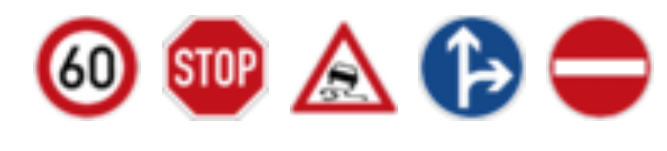

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def readNewImages(filenames):
    images = []
    for name in filenames:
        img = cv2.imread(name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return images

y_new = np.array([3,14,23,36,13])
filenames = ["new/274.png","new/206.png","new/114.png","new/214.png","new/267.png"]
X_new = readNewImages(filenames)
showImageGrid(X_new,5,5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [15]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, chkpt_file)
    
    test_fd = {x: X_new, y: y_new, ptrain: False, keep_prob: 1.0}
    print("New Accuracy = {:.3f}".format(accuracy.eval(test_fd)))
    
    pred_probabilities = sess.run(tf.nn.softmax(y_pred), test_fd)
    pred_flat = np.max(pred_probabilities, axis=1).tolist()
    print('1st Prediction Probabilities: ', pred_flat)

New Accuracy = 0.200
1st Prediction Probabilities:  [0.4384821951389313, 0.9438104629516602, 0.4175935685634613, 0.3174697160720825, 0.9852264523506165]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top = sess.run(tf.nn.top_k(tf.constant(pred_probabilities), k=3))
    print('Top 3 predictions: ', top)

#Graphical view
'''
y_new = np.array([
3,
14,
23,
36,
13])
'''

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.